Code for assigning colors to identified pieces of clothing.

In [392]:
from colorthief import ColorThief # for detecting the dominant color
from PIL import Image
import numpy as np
from rembg import remove # for removing background

In [393]:
#!pip install colorthief
#!pip install rembg

In [394]:
import datasets
es = datasets.load_dataset("adam-narozniak/clothing") # spanish-labeled dataset for testing
es_train = es["train"]

In [395]:
class ColorThiefFromPhoto(ColorThief):
    # Extends ColorThief to accept already initialized PIL photos
    def __init__(self, image):
        self.image = image
        
        
COLOR_DICT = { # some basic color RGBs
"lightgreen":np.array([0, 255, 0]),
"red":np.array([255,0,0]),
"blue":np.array([0,0,255]),
"yellow":np.array([255,255,0]),
"green":np.array([7, 180, 44]),
"purple":np.array([128,0,128]),
"orange":np.array([255, 165, 0]),
"pink":np.array([255, 192, 203]),
"darkpink":np.array([173, 109, 119]),
"lightgray":np.array([200, 200, 200]),
"brown":np.array([123, 63, 0]),
"black":np.array([0,0,0]),
"white":np.array([255,255,255]),
"gray":np.array([128,128,128]),
}

def get_cloth_color(image, bbox):
    """
    Function that returns the name of the color of a given item of clothing.
    Params:
    image -- original image from which to extract the item of clothing
    bbox -- bounding box including the item of clothing, in a form (x1, y1, x2, y2)
    Returns:
    color -- name of the color of the item of clothing (chosen from a list, see COLOR_DICT)
    """
    image_cropped = get_cloth_from_image(image, bbox) 
    
    img_no_background = remove(image_cropped)
    mask = img_no_background.split()[3]
    if np.sum(np.array(mask)<125)/np.prod(np.array(mask).shape) > 0.8: # check if background takes more than 80% of image
        final_img = image_cropped # if so, don't remove background
    else:
        final_img = img_no_background
    ct = ColorThiefFromPhoto(final_img)
    dominating_color = ct.get_color(quality=1) # get dominating color RGB
    dominating_color = np.array(dominating_color)
    distances = []
    for col_rgb in COLOR_DICT.values(): 
        distances.append(np.linalg.norm(dominating_color-col_rgb)) # calculate distances to some basic colors
    #image_no_background_RGB.show()
    color = list(COLOR_DICT.keys())[distances.index(min(distances))] # get color name that is the closest to the dominating color
    return color

def get_cloth_from_image(image, bbox):
    x1, y1, x2, y2 = bbox
    image_cropped = image.crop((x1, y1, x2, y2))
    return image_cropped

lightgray


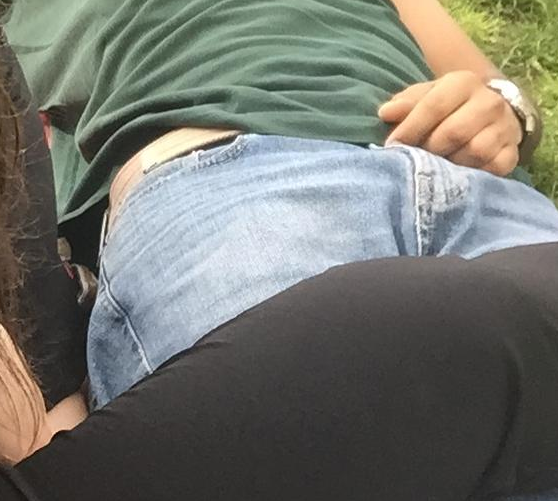

In [396]:
item = 5
bbox = 1
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

lightgray


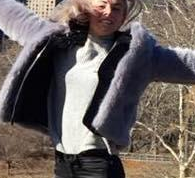

In [397]:
item = 0
bbox = 1
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

black


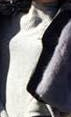

In [398]:
item = 0
bbox = 0
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])) # white is the 2nd color detected
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

orange


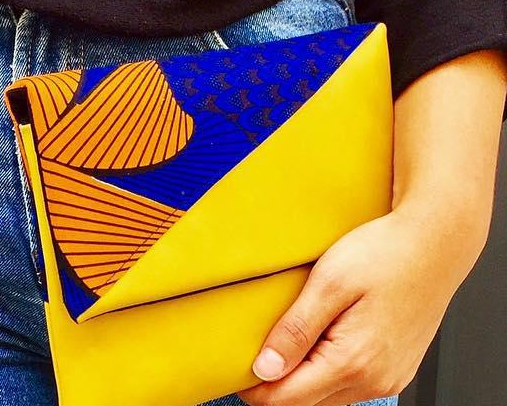

In [399]:
item = 2
bbox = 1
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

black


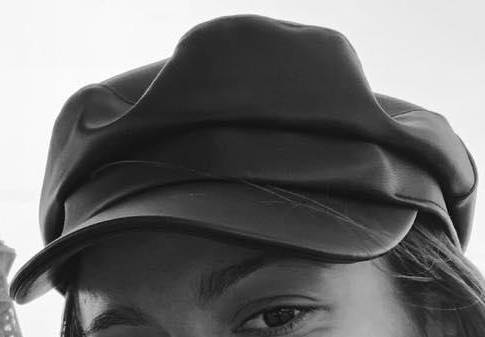

In [400]:
item = 7
bbox = 1
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

black


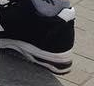

In [401]:
item = 11
bbox = 0
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

darkpink


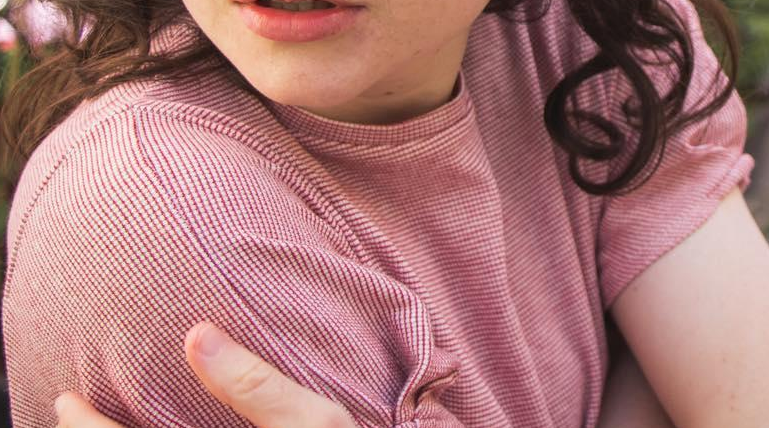

In [402]:
item = 372
bbox = 0
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

gray


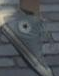

In [403]:
item = 200
bbox = 0
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

black


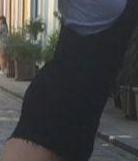

In [404]:
item = 200
bbox = 3
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

lightgray


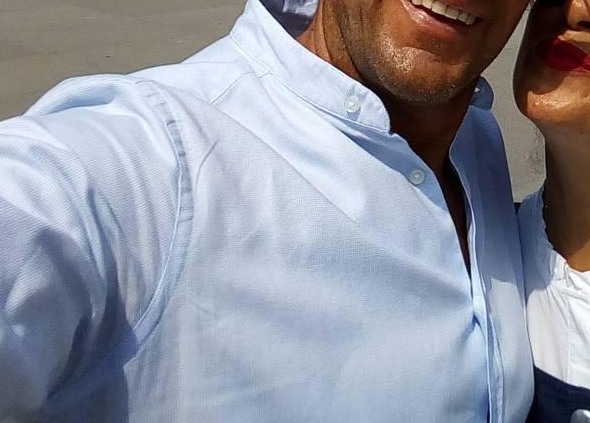

In [405]:
item = 100
bbox = 3
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

lightgray


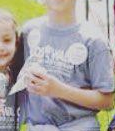

In [422]:
item = 120
bbox = 10
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])

darkpink


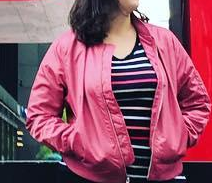

In [425]:
item = 80
bbox = 2
print(get_cloth_color(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox]))
get_cloth_from_image(es_train[item]["image"], es_train[item]['objects']['bbox'][bbox])